In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg

In [3]:
plt.style.use('../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [4]:
import os

In [5]:
test = []

for file in os.listdir("../data/"):

    if file.endswith("h5"):

        ii = jsm_ancillary.load_sample("../data/"+file)

        print("loaded", file)

        test.append([ii.host_mass.values, ii.host_stellarmass.values + ii.Mstar_acc.values, ii.Mstar_ICL.values, ii.Mstar_sat.values])

loaded 11.2_files.h5
loaded 11.8_files.h5
loaded 13.4_files.h5
loaded 12.6_files.h5
loaded 13.2_files.h5
loaded 12.0_files.h5
loaded 13.8_files.h5
loaded 11.4_files.h5
loaded 12.4_files.h5
loaded 14.0_files.h5
loaded 13.6_files.h5
loaded 11.0_files.h5
loaded 11.6_files.h5
loaded 12.2_files.h5
loaded 13.0_files.h5
loaded 12.8_files.h5


In [ ]:
def consolidate(test_index):

    host_mass = test_index[0][0] 

    perc_cenmass = np.percentile(test_index[1], np.array([16, 50, 84]))
    perc_ashmass = np.percentile(test_index[2], np.array([16, 50, 84]))
    perc_satmass = np.percentile(test_index[3], np.array([16, 50, 84]))

    perc_f = np.percentile(test_index[2]/test_index[1], np.array([16, 50, 84]))

    return host_mass, perc_cenmass, perc_ashmass, perc_satmass, perc_f

In [7]:
halo_smooth = np.linspace(10, 15, 100)

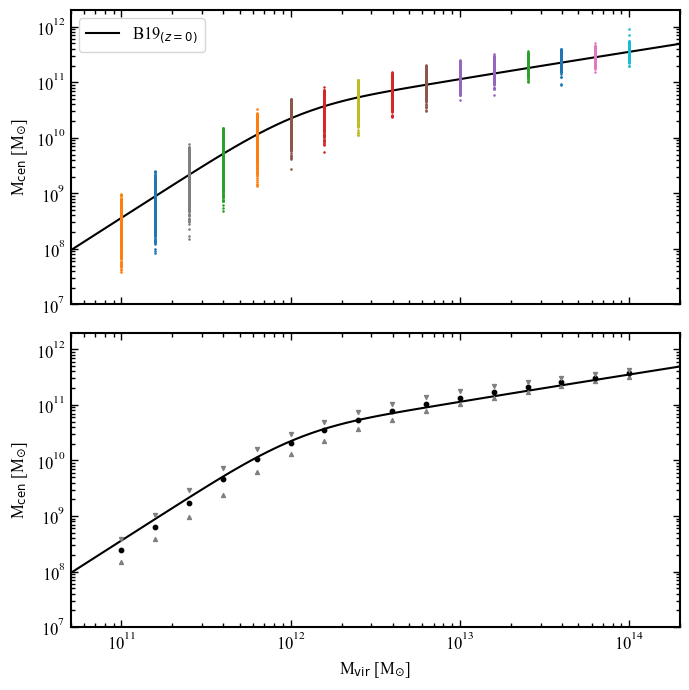

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True, sharey=True)

for i in test:
    host_mass, perc_cenmass, perc_ashmass, perc_satmass, perc_f = consolidate(i)
    ax[0].scatter(i[0], i[1], marker=".", s=3)

    ax[1].scatter(host_mass, perc_cenmass[0], color="grey", marker="^", s=8)
    ax[1].scatter(host_mass, perc_cenmass[1], color="k", s=10)
    ax[1].scatter(host_mass, perc_cenmass[2], color="grey", marker="v", s=8)

ax[1].plot(10**halo_smooth, 10**gh.lgMs_B18(halo_smooth), label=fr"B19$_{{(z={0})}}$", color="k", lw=1.5, zorder=0)
ax[0].plot(10**halo_smooth, 10**gh.lgMs_B18(halo_smooth), label=fr"B19$_{{(z={0})}}$", color="k", lw=1.5, zorder=0)

ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].legend()
ax[0].set_xlim(5e10,2e14)
ax[0].set_ylim(1e7)

ax[1].set_xlabel("M$_{\\rm vir}$ [M$_{\\odot}$]")
ax[0].set_ylabel("M$_{\\rm cen}$ [M$_{\\odot}$]")
ax[1].set_ylabel("M$_{\\rm cen}$ [M$_{\\odot}$]")

plt.tight_layout()
plt.show()

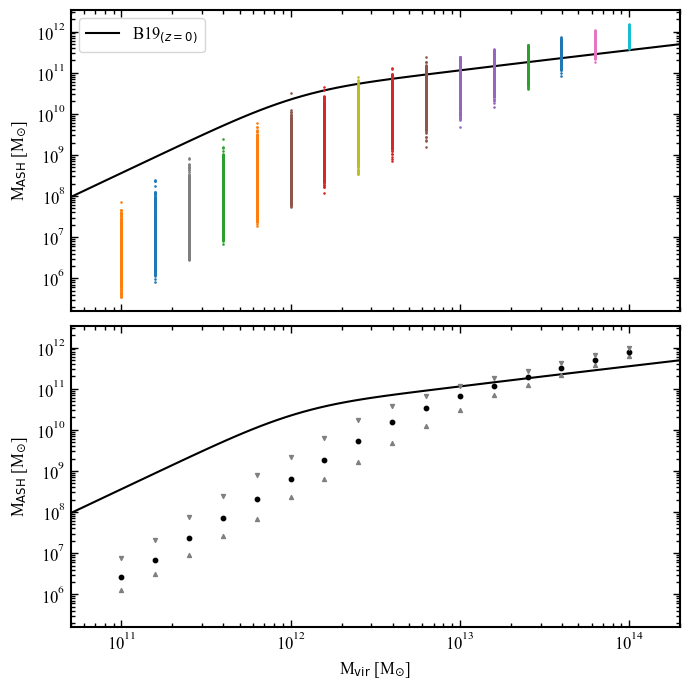

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True, sharey=True)

for i in test:
    host_mass, perc_cenmass, perc_ashmass, perc_satmass, perc_f = consolidate(i)
    ax[0].scatter(i[0], i[2], marker=".", s=3)

    ax[1].scatter(host_mass, perc_ashmass[0], color="grey", marker="^", s=8)
    ax[1].scatter(host_mass, perc_ashmass[1], color="k", s=10)
    ax[1].scatter(host_mass, perc_ashmass[2], color="grey", marker="v", s=8)

ax[1].plot(10**halo_smooth, 10**gh.lgMs_B18(halo_smooth), label=fr"B19$_{{(z={0})}}$", color="k", lw=1.5, zorder=0)
ax[0].plot(10**halo_smooth, 10**gh.lgMs_B18(halo_smooth), label=fr"B19$_{{(z={0})}}$", color="k", lw=1.5, zorder=0)

ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].legend()
ax[0].set_xlim(5e10,2e14)
# ax[0].set_ylim(1e7)

ax[1].set_xlabel("M$_{\\rm vir}$ [M$_{\\odot}$]")
ax[0].set_ylabel("M$_{\\rm ASH}$ [M$_{\\odot}$]")
ax[1].set_ylabel("M$_{\\rm ASH}$ [M$_{\\odot}$]")

plt.tight_layout()
plt.show()

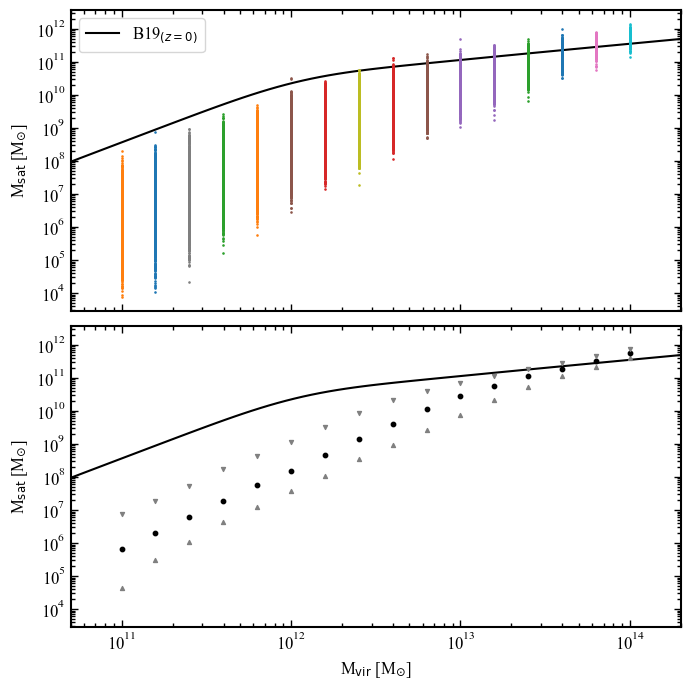

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True, sharey=True)

for i in test:
    host_mass, perc_cenmass, perc_satmass, perc_satmass, perc_f = consolidate(i)
    ax[0].scatter(i[0], i[3], marker=".", s=3)

    ax[1].scatter(host_mass, perc_satmass[0], color="grey", marker="^", s=8)
    ax[1].scatter(host_mass, perc_satmass[1], color="k", s=10)
    ax[1].scatter(host_mass, perc_satmass[2], color="grey", marker="v", s=8)

ax[1].plot(10**halo_smooth, 10**gh.lgMs_B18(halo_smooth), label=fr"B19$_{{(z={0})}}$", color="k", lw=1.5, zorder=0)
ax[0].plot(10**halo_smooth, 10**gh.lgMs_B18(halo_smooth), label=fr"B19$_{{(z={0})}}$", color="k", lw=1.5, zorder=0)

ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].legend()
ax[0].set_xlim(5e10,2e14)
# ax[0].set_ylim(1e7)

ax[1].set_xlabel("M$_{\\rm vir}$ [M$_{\\odot}$]")
ax[0].set_ylabel("M$_{\\rm sat}$ [M$_{\\odot}$]")
ax[1].set_ylabel("M$_{\\rm sat}$ [M$_{\\odot}$]")

plt.tight_layout()
plt.show()

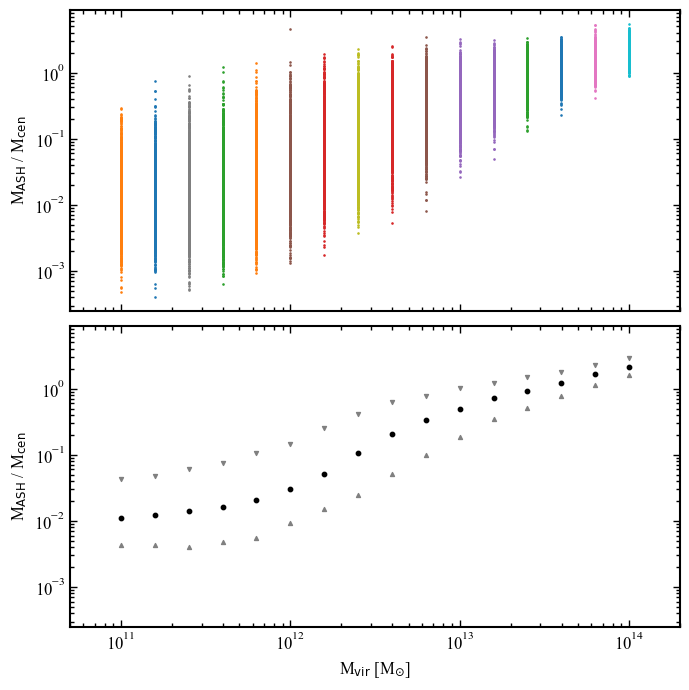

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True, sharey=True)

for i in test:
    host_mass, perc_cenmass, perc_satmass, perc_satmass, perc_f = consolidate(i)
    ax[0].scatter(i[0], i[2]/i[1], marker=".", s=3)

    ax[1].scatter(host_mass, perc_f[0], color="grey", marker="^", s=8)
    ax[1].scatter(host_mass, perc_f[1], color="k", s=10)
    ax[1].scatter(host_mass, perc_f[2], color="grey", marker="v", s=8)


ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlim(5e10,2e14)
# ax[0].set_ylim(1e7)

ax[1].set_xlabel("M$_{\\rm vir}$ [M$_{\\odot}$]")
ax[0].set_ylabel("M$_{\\rm ASH}$ / M$_{\\rm cen}$")
ax[1].set_ylabel("M$_{\\rm ASH}$ / M$_{\\rm cen}$")

plt.tight_layout()
plt.show()

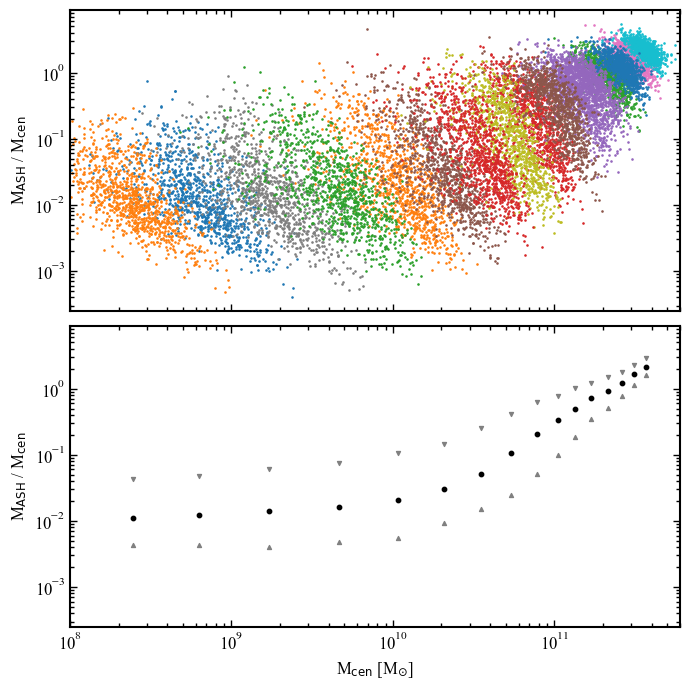

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True, sharey=True)

for i in test:
    host_mass, perc_cenmass, perc_satmass, perc_satmass, perc_f = consolidate(i)
    ax[0].scatter(i[1], i[2]/i[1], marker=".", s=3)

    ax[1].scatter(perc_cenmass[1], perc_f[0], color="grey", marker="^", s=8)
    ax[1].scatter(perc_cenmass[1], perc_f[1], color="k", s=10)
    ax[1].scatter(perc_cenmass[1], perc_f[2], color="grey", marker="v", s=8)


ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_xlim(1e8,6e11)
# ax[0].set_ylim(1e7)

ax[1].set_xlabel("M$_{\\rm cen}$ [M$_{\\odot}$]")
ax[0].set_ylabel("M$_{\\rm ASH}$ / M$_{\\rm cen}$")
ax[1].set_ylabel("M$_{\\rm ASH}$ / M$_{\\rm cen}$")

plt.tight_layout()
plt.show()